# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
combine_data["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID=combine_data.loc[combine_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID_data=combine_data[combine_data["Mouse ID"]=='g989']
duplicate_mouse_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine_data=combine_data[combine_data["Mouse ID"].isin(duplicate_mouse_ID)==False]
clean_combine_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_combine_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_mean=clean_combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_median=clean_combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_variance=clean_combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_standard_deviation=clean_combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_SEM=clean_combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_summary_statistics=pd.DataFrame(
    {
        "mean":mouse_mean,
        "median":mouse_median,
        "variance":mouse_variance,
        "standard deviation":mouse_standard_deviation,
        "SEM":mouse_SEM
    }
)
mouse_summary_statistics

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary_statistics_ag=clean_combine_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
mouse_summary_statistics_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Total number of rows (Mouse ID/Timepoints) for each drug regimen'}, xlabel='Drug Regimen', ylabel='Number of rows'>

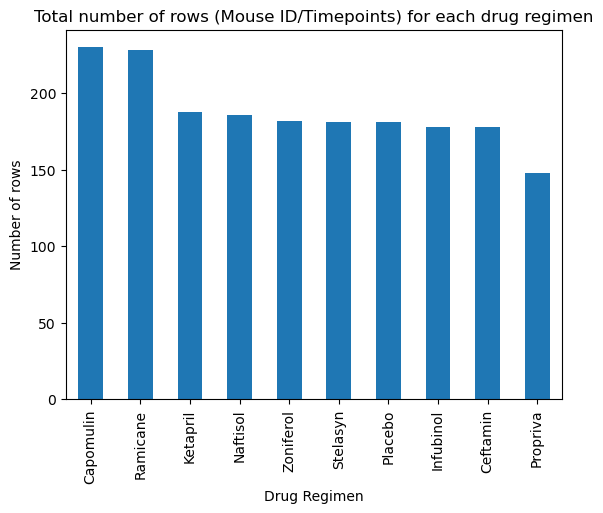

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
mouse_count=clean_combine_data["Drug Regimen"].value_counts()
mouse_count.plot(kind="bar",title="Total number of rows (Mouse ID/Timepoints) for each drug regimen",xlabel="Drug Regimen",ylabel="Number of rows")



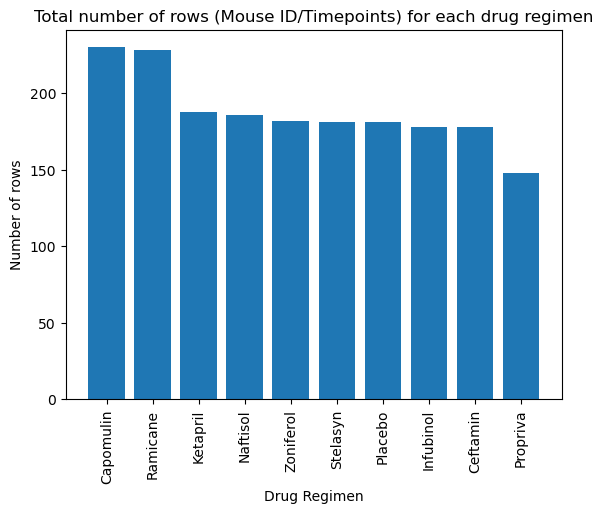

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_count.index,mouse_count.values)
plt.title("Total number of rows (Mouse ID/Timepoints) for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of rows")
plt.xticks(rotation=90)
plt.show()


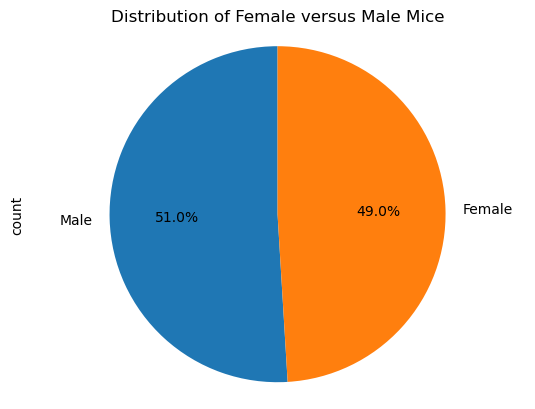

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution=clean_combine_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female versus Male Mice")
plt.axis("equal")
plt.show()

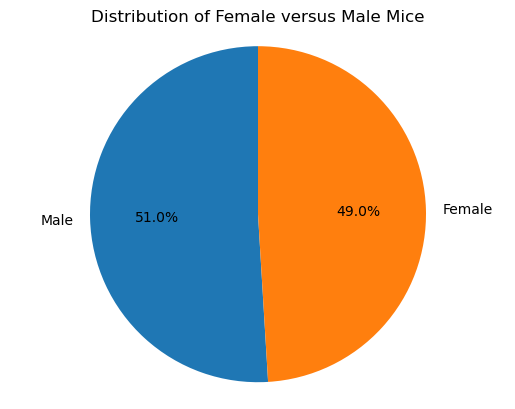

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_combine_data["Sex"].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,autopct="%1.1f%%",startangle=90)
plt.title("Distribution of Female versus Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_regimens=["Capomulin","Ramicane","Infubinol","Ceftamin"]
filtered_df=combine_data[combine_data["Drug Regimen"].isin(treatment_regimens)]

max_timepoint=filtered_df.groupby("Mouse ID")["Timepoint"].max()

final_tumor_volume_df=pd.merge(max_timepoint,filtered_df,how="left",on=["Mouse ID","Timepoint"])
final_tumor_volume=final_tumor_volume_df["Tumor Volume (mm3)"]
print(final_tumor_volume)

0     67.973419
1     65.525743
2     62.999356
3     38.407618
4     43.047543
        ...    
95    68.594745
96    31.896238
97    64.729837
98    30.638696
99    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_vol = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_vol)

    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5*IQR)
    upper_bound = upper_quartile + (1.5*IQR)

    outliers = tumor_vol[(tumor_vol<lower_bound) | (tumor_vol>upper_bound)]

    print(f"Drug Regimen: {treatment}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers: {outliers}")


Drug Regimen: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Regimen: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Regimen: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


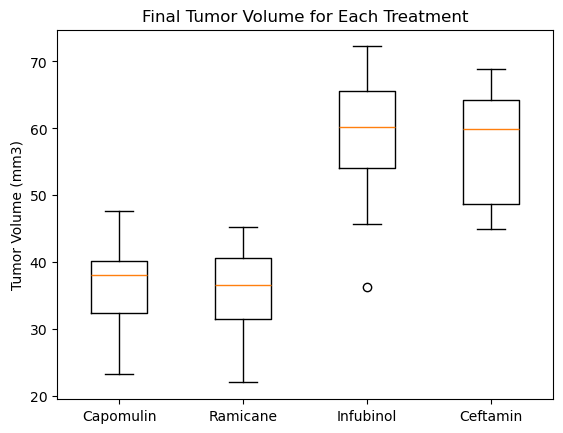

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data,labels=treatments)
plt.title("Final Tumor Volume for Each Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

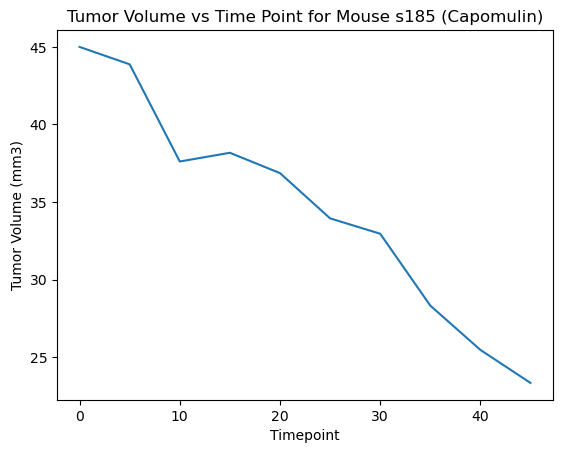

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data=combine_data[combine_data["Drug Regimen"]=="Capomulin"]
single_mouse_data=capomulin_data[capomulin_data["Mouse ID"]=="s185"]
plt.plot(single_mouse_data["Timepoint"],single_mouse_data["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Time Point for Mouse s185 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


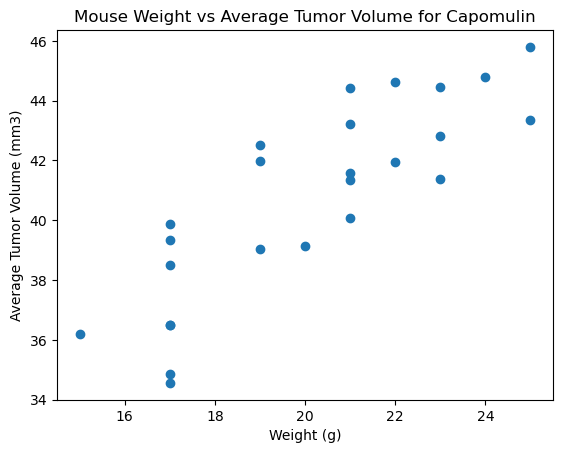

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=combine_data[combine_data["Drug Regimen"]=="Capomulin"]
average_tumor_volume=capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume=average_tumor_volume.reset_index()
average_tumor_volume=average_tumor_volume.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})
average_tumor_volume=pd.merge(capomulin_data,average_tumor_volume,on="Mouse ID")
average_tumor_volume=average_tumor_volume.drop_duplicates(subset="Mouse ID")
plt.scatter(average_tumor_volume["Weight (g)"],average_tumor_volume["Average Tumor Volume"])
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data=combine_data[combine_data["Drug Regimen"]=="Capomulin"]

correlation_coefficient = st.pearsonr(average_tumor_volume["Weight (g)"],average_tumor_volume["Average Tumor Volume"])[0]
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume["Weight (g)"],average_tumor_volume["Average Tumor Volume"])

print(f"Correlation Coefficient: {correlation_coefficient}")
print("Linear Regression Model:")
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R Value: ", r_value)
print("P Value: ", p_value)
print("Standard Error: ", std_err)

Correlation Coefficient: 0.841936342469472
Linear Regression Model:
Slope:  0.954439689024105
Intercept:  21.552160532685004
R Value:  0.8419363424694724
P Value:  1.322572243471219e-07
Standard Error:  0.12754359033201315
